### Group 92 Project Proposal
- Members: Alan, Bowen, Jia Yi, Kiki

### Which team will win the 22nd FIFA World Cup?

### Introduction

The FIFA World Cup is an international football competition held by the Fédération Internationale de Football Association (FIFA) once every four years. Contesting teams are made up of the senior men's national teams of countries that are FIFA members. This is the most prestigious and most widely viewed association football tournament in the world. 

The current competition structure starts with qualifying tournaments that are held within the 6 FIFA continental zones (Africa, Asia, North and Central America and Caribbean, South America, Oceania, and Europe) to pick the top 32 national teams. This is followed by a final tournament which includes a group stage and knockout stage. In the former, 32 teams compete within 8 groups of 4 in a round-robin format and the top 2 teams of each group advance to the knockout stage. In the latter, one-off matches are played through the quarter-finals, semi-finals, third-place match and the finals.  

The next FIFA World Cup is scheduled to take place in Qatar from 20 November to 18 December 2022. This 22nd running of the FIFA World Cup has gained immense attention, a level that is higher than any other of its predecessors. Predictions of the next championship holder has also since been a hot topic as the 32 teams are confirmed and the final tournament inches closer. 

Hence, our team wishes to utilise the data from all World Cups, World Cup matches and World Cup players to predict the next champion of the FIFA World Cup. The number of goals scored, number of qualified teams, number of matches played for each World Cup, the players and coaches for each Word Cup, as well as the results of all matches will be used to  eventually complete a prediction based on the 32 teams picked for the 22nd FIFA World Cup.

### Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#read data
world_cup_data <- read_csv("FIFA_World_Cup.csv")

#clean and wrangle data
world_cup_data <- world_cup_data |>
    select(-...1, -Datetime, -Stadium, -City, -Attendance:-Away.Team.Initials) |>
    mutate(winner = ifelse(Home.Team.Goals > Away.Team.Goals,
                           Home.Team.Name,
                           ifelse(Home.Team.Goals < Away.Team.Goals,
                                  Away.Team.Name,
                                  "draw"))) |>
    pivot_longer(cols = c("Home.Team.Name", "Away.Team.Name"),
                 names_to = "home_away_name",
                 values_to = "team") |>
    pivot_longer(cols = c("Home.Team.Goals", "Away.Team.Goals"),
                 names_to = "home_away_goals",
                 values_to = "goals") |>
    mutate(home_away_name = substring(home_away_name, 1, 9)) |>
    mutate(home_away_goals = substring(home_away_goals, 1, 9)) |>
    filter(home_away_name == home_away_goals) |>
    filter(winner == team) |>
    select(-home_away_name, -winner, -home_away_goals)
world_cup_data

New names:
• `` -> `...1`
Rows: 850 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Datetime, Stage, Stadium, City, Home.Team.Name, Away.Team.Name, Wi...
dbl  (9): ...1, Year, Home.Team.Goals, Away.Team.Goals, Attendance, Half.tim...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Stage,Win.conditions,team,goals
<dbl>,<chr>,<chr>,<chr>,<dbl>
1930,Group 1,NA,France,4
1930,Group 4,NA,USA,3
1930,Group 2,NA,Yugoslavia,2
1930,Group 3,NA,Romania,3
1930,Group 1,NA,Argentina,1
1930,Group 1,NA,Chile,3
1930,Group 2,NA,Yugoslavia,4
1930,Group 4,NA,USA,3
1930,Group 3,NA,Uruguay,1


In [3]:
#summarize the data, 8 countries with the most wins
summarize_data <- world_cup_data |>
    group_by(team) |>
    summarize(nwins = n()) |>
    arrange(desc(nwins)) |>
    slice(1:8)
summarize_data

team,nwins
<chr>,<int>
Brazil,71
Italy,45
Argentina,44
Germany FR,36
Germany,32
France,29
Netherlands,29
Spain,29


In [4]:
summarize_data <- world_cup_data |>
    filter(team %in% c("Brazil", "Italy", "Argentina", "Germany FR", "Germany", "France", "Netherlands", "Spain")) |>
    group_by(team) |>
    summarize(total_goals = sum(goals),
             nmatches = n()) |>
    mutate(goals_to_matches = total_goals / nmatches)
summarize_data

team,total_goals,nmatches,goals_to_matches
<chr>,<dbl>,<int>,<dbl>
Argentina,109,44,2.477273
Brazil,201,71,2.830986
France,85,29,2.931034
Germany,88,32,2.750000
Germany FR,101,36,2.805556
Italy,101,45,2.244444
Netherlands,74,29,2.551724
Spain,70,29,2.413793


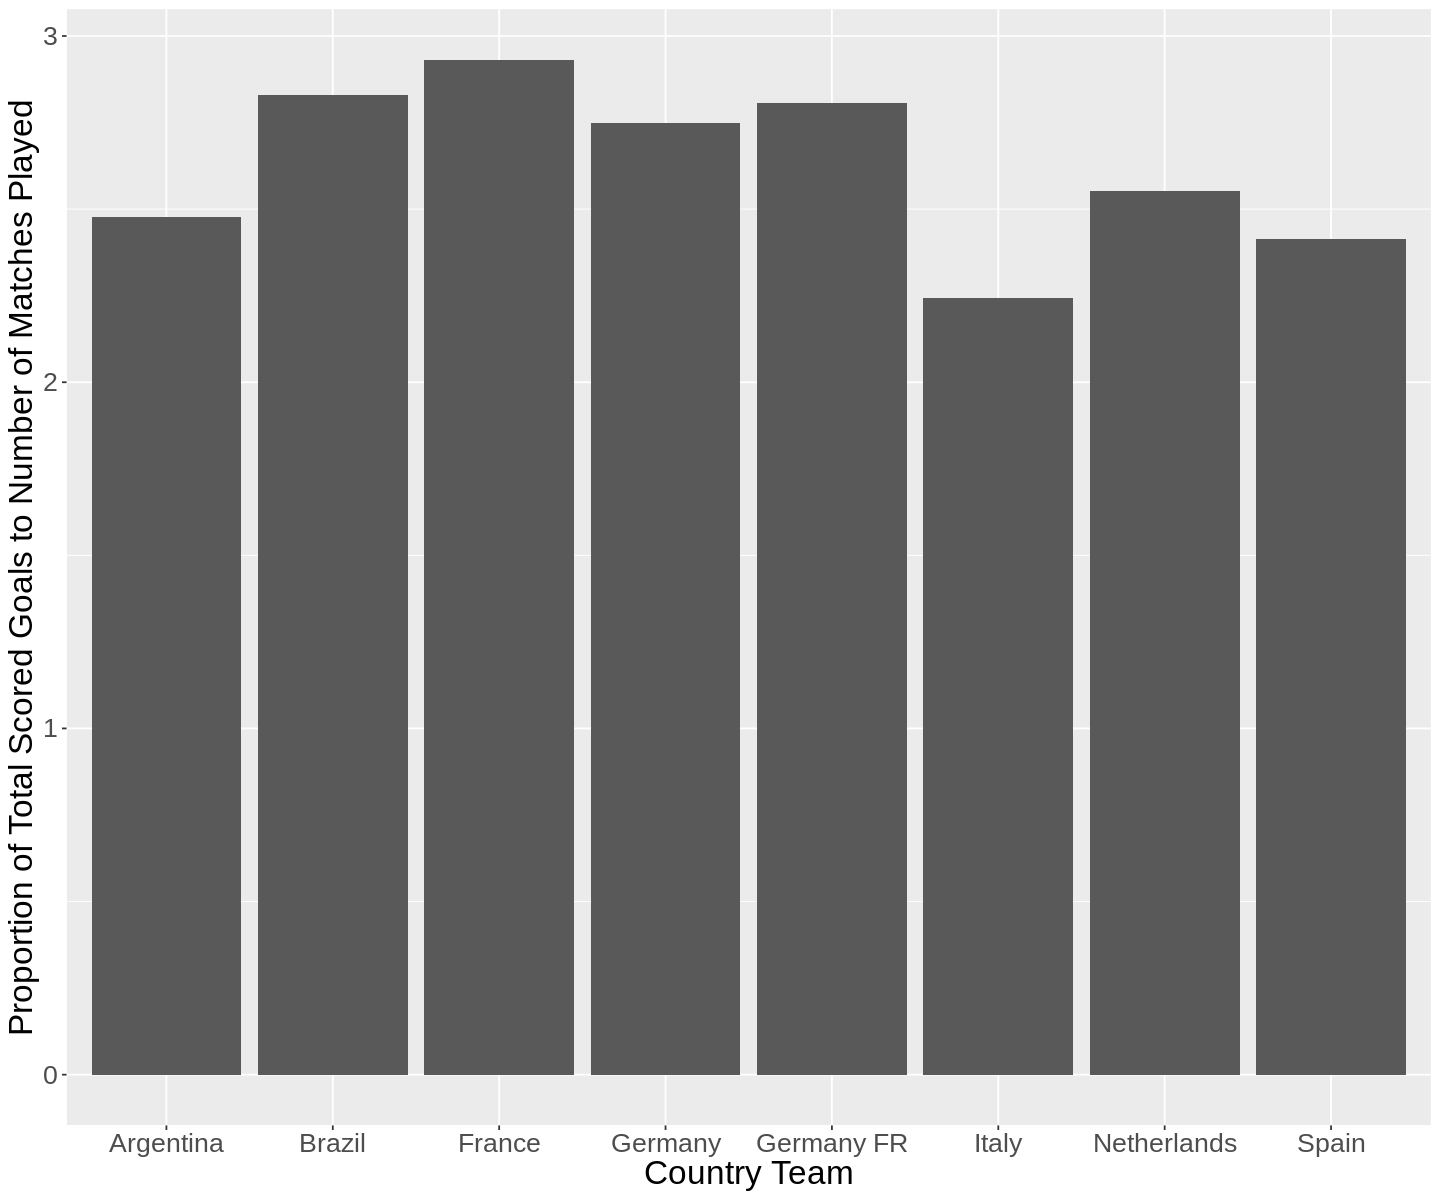

In [5]:
#visualize the data, plot proportion of goals/matches versus 8 most winning teams
options(repr.plot.width = 12, repr.plot.height = 10)
visualize_data <- summarize_data |>
    ggplot(aes(x = team, y = goals_to_matches)) +
        geom_bar(stat = "identity") +
        labs(x = "Country Team",
             y = "Proportion of Total Scored Goals to Number of Matches Played") +
        theme(text = element_text(size = 20))
visualize_data

### Methods

### Expected outcomes and significance

The predicted outcome of this research will hopefully give us a number of candidates, or the top ? teams that will be able to make it to the final playoffs. Because of this, the initial grouping of the teams is a significant factor. By just narrowing the teams down, others will be able to focus on a deeper analysis of the individual teams. Including the results of recent non world cup matches or key player influence in parameters could be something interessant to do and will improve the constrained outcome of our investigation.

Limitations: FIFA ranking ends in 2014, thus the most recent dataset is lacking. This investigation will therefore reflect results that don’t reflect the 2018 tournament.